In [55]:
!pip3 install pandas
!pip3 install prophet

In [112]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
import requests
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [57]:
df = pd.read_csv('./london_weather.csv')

In [58]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [60]:
def convert_int_to_datetime(date_int):
    date_str = str(date_int)
    return datetime.strptime(date_str, '%Y%m%d')

df['date'] = df['date'].apply(convert_int_to_datetime)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [61]:
mean_df = df[['date', 'mean_temp']]
mean_df = mean_df.rename(columns={'date':'ds', 'mean_temp': 'y'})

In [62]:
mean_df

,ds,y
0,1979-01-01,-4.1
1,1979-01-02,-2.6
2,1979-01-03,-2.8
3,1979-01-04,-2.6
4,1979-01-05,-0.8
...,...,...
15336,2020-12-27,7.5
15337,2020-12-28,1.1
15338,2020-12-29,2.6
15339,2020-12-30,2.7


In [63]:
model = Prophet()
model.fit(mean_df)
future = model.make_future_dataframe(periods=1826)

19:21:39 - cmdstanpy - INFO - Chain [1] start processing
19:21:44 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
future

,ds
0,1979-01-01
1,1979-01-02
2,1979-01-03
3,1979-01-04
4,1979-01-05
...,...
17126,2025-12-27
17127,2025-12-28
17128,2025-12-29
17129,2025-12-30


In [65]:
forecast = model.predict(future)

In [66]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,10.104267,0.250134,7.892312,10.104267,10.104267,-5.967724,-5.967724,-5.967724,-0.009022,-0.009022,-0.009022,-5.958701,-5.958701,-5.958701,0.0,0.0,0.0,4.136543
1,1979-01-02,10.104691,0.647183,7.848988,10.104691,10.104691,-6.015527,-6.015527,-6.015527,-0.020544,-0.020544,-0.020544,-5.994983,-5.994983,-5.994983,0.0,0.0,0.0,4.089164
2,1979-01-03,10.105116,0.306034,7.767336,10.105116,10.105116,-5.986756,-5.986756,-5.986756,0.045490,0.045490,0.045490,-6.032247,-6.032247,-6.032247,0.0,0.0,0.0,4.118359
3,1979-01-04,10.105540,0.327509,7.650881,10.105540,10.105540,-6.045966,-6.045966,-6.045966,0.024049,0.024049,0.024049,-6.070015,-6.070015,-6.070015,0.0,0.0,0.0,4.059574
4,1979-01-05,10.105964,0.646863,7.948765,10.105964,10.105964,-6.115902,-6.115902,-6.115902,-0.008126,-0.008126,-0.008126,-6.107776,-6.107776,-6.107776,0.0,0.0,0.0,3.990062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17126,2025-12-27,13.259713,3.668894,10.985911,12.814164,13.621093,-5.840103,-5.840103,-5.840103,-0.028975,-0.028975,-0.028975,-5.811128,-5.811128,-5.811128,0.0,0.0,0.0,7.419610
17127,2025-12-28,13.260043,3.737625,11.190642,12.814232,13.621710,-5.840867,-5.840867,-5.840867,-0.002872,-0.002872,-0.002872,-5.837995,-5.837995,-5.837995,0.0,0.0,0.0,7.419176
17128,2025-12-29,13.260372,3.737931,10.846374,12.814300,13.622326,-5.876306,-5.876306,-5.876306,-0.009022,-0.009022,-0.009022,-5.867284,-5.867284,-5.867284,0.0,0.0,0.0,7.384066
17129,2025-12-30,13.260702,3.533685,11.039135,12.814368,13.622943,-5.919377,-5.919377,-5.919377,-0.020544,-0.020544,-0.020544,-5.898832,-5.898832,-5.898832,0.0,0.0,0.0,7.341325


/Users/cattienle/anaconda3/envs/testmojave/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/cattienle/anaconda3/envs/testmojave/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


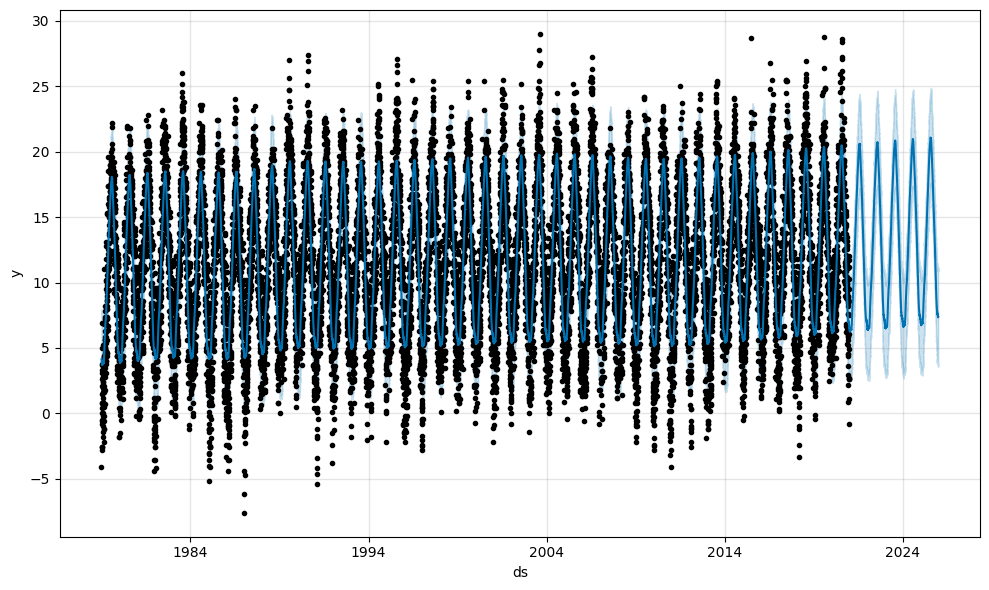

In [67]:
# This shows a narrow prediction line, indicating past trends can be used to make a prediction about average daily temps
fig = model.plot(forecast)

In [68]:
max_df = df[['date', 'max_temp']]
max_df = max_df.rename(columns={'date':'ds', 'max_temp': 'y'})

min_df = df[['date', 'min_temp']]
min_df = min_df.rename(columns={'date':'ds', 'min_temp': 'y'})

In [69]:
model_max = Prophet()
model_max.fit(max_df)
future_max = model_max.make_future_dataframe(periods=1825)

model_min = Prophet()
model_min.fit(min_df)
future_min = model_min.make_future_dataframe(periods=1825)

19:21:59 - cmdstanpy - INFO - Chain [1] start processing
19:22:09 - cmdstanpy - INFO - Chain [1] done processing
19:22:11 - cmdstanpy - INFO - Chain [1] start processing
19:22:15 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
forecast_max = model_max.predict(future_max)

forecast_min = model_min.predict(future_min)

/Users/cattienle/anaconda3/envs/testmojave/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/cattienle/anaconda3/envs/testmojave/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


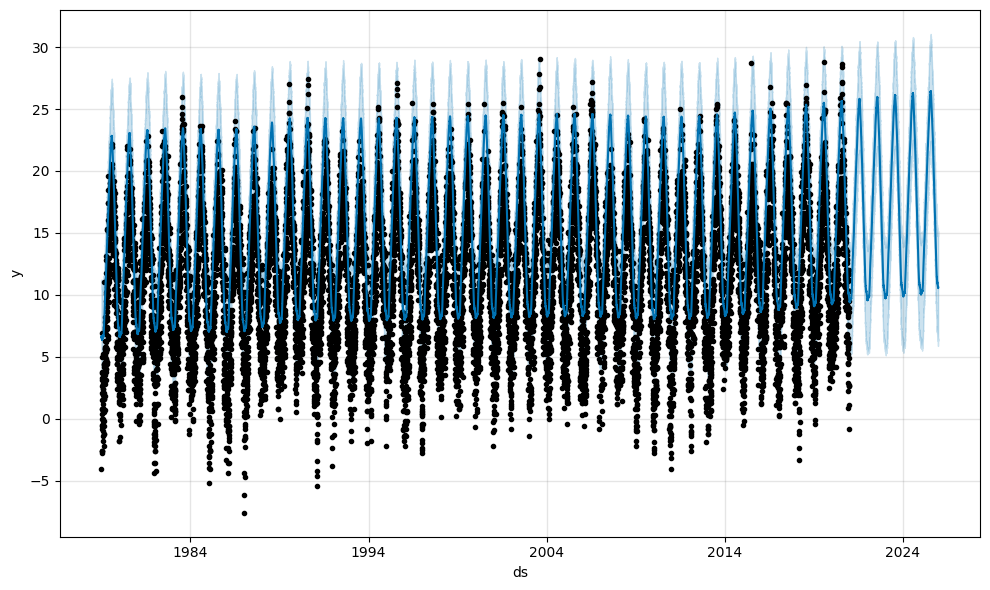

In [71]:
fig_max = model.plot(forecast_max)

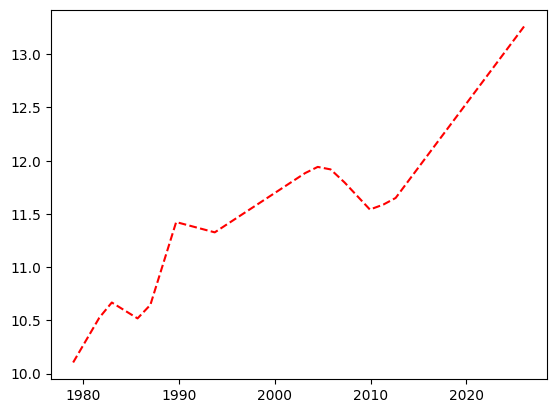

In [72]:
linear_reg_line = plt.plot(forecast['ds'], forecast['trend'], linestyle='--', color='red', label='Linear Regression Line')

In [73]:
forecast = forecast.set_index('ds')

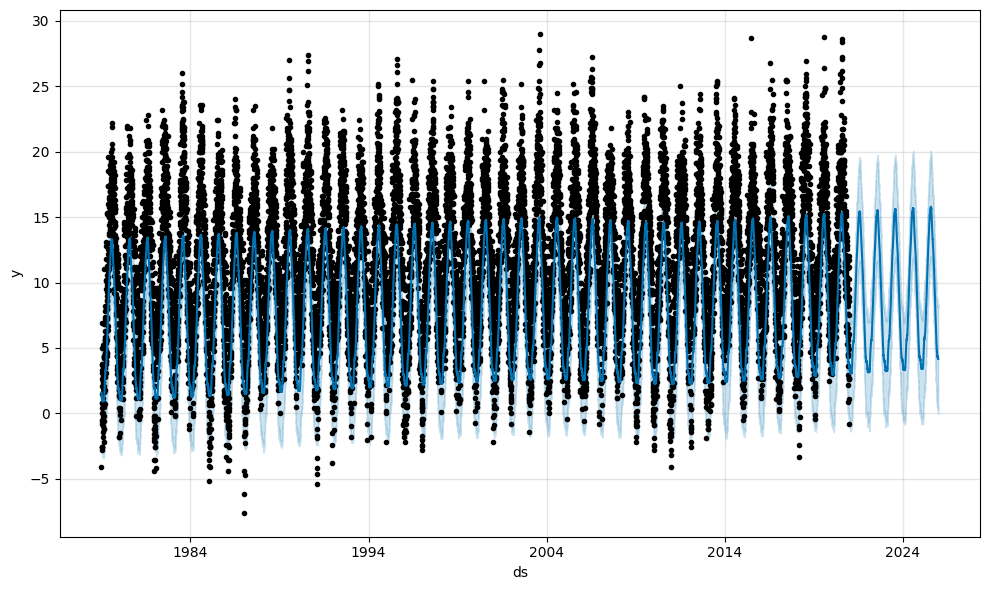

In [74]:
fig_min = model.plot(forecast_min)

<Axes: xlabel='ds'>

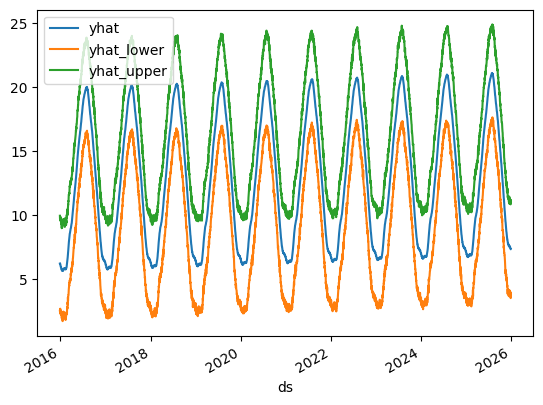

In [75]:
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-3650:,:].plot()

In [138]:
api = "http://api.openweathermap.org/geo/1.0/direct?q=London&limit=5&appid=284e496da06f1c5662d7a763ce4950b8"

get_api = requests.get(api)
get_api

<Response [200]>

In [139]:
get_api.json()

[{'name': 'London',
  'local_names': {'cs': 'Londýn',
   'te': 'లండన్',
   'ps': 'لندن',
   'gu': 'લંડન',
   'ar': 'لندن',
   'so': 'London',
   'sv': 'London',
   'gv': 'Lunnin',
   'mn': 'Лондон',
   'to': 'Lonitoni',
   'pa': 'ਲੰਡਨ',
   'mg': 'Lôndôna',
   'oc': 'Londres',
   'pt': 'Londres',
   'sk': 'Londýn',
   'eu': 'Londres',
   'ht': 'Lonn',
   'om': 'Landan',
   'cu': 'Лондонъ',
   'nv': 'Tooh Dineʼé Bikin Haalʼá',
   'fj': 'Lodoni',
   'ba': 'Лондон',
   'tg': 'Лондон',
   'sh': 'London',
   'th': 'ลอนดอน',
   'nl': 'Londen',
   'gn': 'Lóndyre',
   'bh': 'लंदन',
   'mk': 'Лондон',
   'cy': 'Llundain',
   'uz': 'London',
   'bg': 'Лондон',
   'av': 'Лондон',
   'en': 'London',
   'lv': 'Londona',
   'sc': 'Londra',
   'ln': 'Lóndɛlɛ',
   'es': 'Londres',
   'ml': 'ലണ്ടൻ',
   'kl': 'London',
   'sl': 'London',
   'mt': 'Londra',
   'li': 'Londe',
   'uk': 'Лондон',
   'ab': 'Лондон',
   'wo': 'Londar',
   'kw': 'Loundres',
   'gl': 'Londres',
   'zh': '伦敦',
   'km': 'ឡុងដ៍',
 

In [140]:
london = get_api.json()[0]
london

{'name': 'London',
 'local_names': {'cs': 'Londýn',
  'te': 'లండన్',
  'ps': 'لندن',
  'gu': 'લંડન',
  'ar': 'لندن',
  'so': 'London',
  'sv': 'London',
  'gv': 'Lunnin',
  'mn': 'Лондон',
  'to': 'Lonitoni',
  'pa': 'ਲੰਡਨ',
  'mg': 'Lôndôna',
  'oc': 'Londres',
  'pt': 'Londres',
  'sk': 'Londýn',
  'eu': 'Londres',
  'ht': 'Lonn',
  'om': 'Landan',
  'cu': 'Лондонъ',
  'nv': 'Tooh Dineʼé Bikin Haalʼá',
  'fj': 'Lodoni',
  'ba': 'Лондон',
  'tg': 'Лондон',
  'sh': 'London',
  'th': 'ลอนดอน',
  'nl': 'Londen',
  'gn': 'Lóndyre',
  'bh': 'लंदन',
  'mk': 'Лондон',
  'cy': 'Llundain',
  'uz': 'London',
  'bg': 'Лондон',
  'av': 'Лондон',
  'en': 'London',
  'lv': 'Londona',
  'sc': 'Londra',
  'ln': 'Lóndɛlɛ',
  'es': 'Londres',
  'ml': 'ലണ്ടൻ',
  'kl': 'London',
  'sl': 'London',
  'mt': 'Londra',
  'li': 'Londe',
  'uk': 'Лондон',
  'ab': 'Лондон',
  'wo': 'Londar',
  'kw': 'Loundres',
  'gl': 'Londres',
  'zh': '伦敦',
  'km': 'ឡុងដ៍',
  'ru': 'Лондон',
  'ga': 'Londain',
  'yi': 'לאנדאן

In [141]:
london['lat']

51.5073219

In [142]:
london['lon']

-0.1276474

In [164]:
london_api = "https://api.openweathermap.org/data/3.0/onecall?lat=51.51&lon=-0.13&exclude=current,minutely,hourly,alerts&appid=77ab0d254ac9b998b6aabc97fcdd0896"
london_api

'https://api.openweathermap.org/data/3.0/onecall?lat=51.51&lon=-0.13&exclude=current,minutely,hourly,alerts&appid=77ab0d254ac9b998b6aabc97fcdd0896'

In [165]:
get_api_london = requests.get(london_api)

In [166]:
get_api_london.json()

{'lat': 51.51,
 'lon': -0.13,
 'timezone': 'Europe/London',
 'timezone_offset': 0,
 'daily': [{'dt': 1707393600,
   'sunrise': 1707377315,
   'sunset': 1707411650,
   'moonrise': 1707376560,
   'moonset': 1707403140,
   'moon_phase': 0.94,
   'summary': 'Expect a day of partly cloudy with rain',
   'temp': {'day': 279.19,
    'min': 278.36,
    'max': 283.89,
    'night': 283.11,
    'eve': 283.52,
    'morn': 278.36},
   'feels_like': {'day': 275.84,
    'night': 280.07,
    'eve': 283.09,
    'morn': 275.56},
   'pressure': 991,
   'humidity': 96,
   'dew_point': 278.49,
   'wind_speed': 6.89,
   'wind_deg': 155,
   'wind_gust': 14.3,
   'weather': [{'id': 501,
     'main': 'Rain',
     'description': 'moderate rain',
     'icon': '10d'}],
   'clouds': 100,
   'pop': 1,
   'rain': 16.03,
   'uvi': 0.07},
  {'dt': 1707480000,
   'sunrise': 1707463611,
   'sunset': 1707498160,
   'moonrise': 1707464820,
   'moonset': 1707495180,
   'moon_phase': 0,
   'summary': 'Expect a day of partly

In [ ]:
##Cross Validation

In [101]:
prophet_validation = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

  0%|                                                    | 0/80 [00:00<?, ?it/s]19:38:11 - cmdstanpy - INFO - Chain [1] start processing
19:38:12 - cmdstanpy - INFO - Chain [1] done processing
  1%|▌                                           | 1/80 [00:00<00:55,  1.42it/s]19:38:12 - cmdstanpy - INFO - Chain [1] start processing
19:38:12 - cmdstanpy - INFO - Chain [1] done processing
  2%|█                                           | 2/80 [00:01<00:48,  1.62it/s]19:38:13 - cmdstanpy - INFO - Chain [1] start processing
19:38:13 - cmdstanpy - INFO - Chain [1] done processing
  4%|█▋                                          | 3/80 [00:01<00:45,  1.68it/s]19:38:13 - cmdstanpy - INFO - Chain [1] start processing
19:38:13 - cmdstanpy - INFO - Chain [1] done processing
  5%|██▏                                         | 4/80 [00:02<00:47,  1.61it/s]19:38:14 - cmdstanpy - INFO - Chain [1] start processing
19:38:14 - cmdstanpy - INFO - Chain [1] done processing
  6%|██▊                           

In [115]:
prophet_validation

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1981-01-26,4.653415,1.411674,8.192115,6.3,1981-01-25
1,1981-01-27,4.737731,1.381978,7.927180,8.4,1981-01-25
2,1981-01-28,4.819820,1.722515,7.885510,7.2,1981-01-25
3,1981-01-29,4.864287,1.787407,8.520369,7.0,1981-01-25
4,1981-01-30,4.621247,1.478268,8.028102,0.1,1981-01-25
...,...,...,...,...,...,...
29125,2020-12-27,6.720517,3.285955,10.393279,7.5,2020-01-01
29126,2020-12-28,6.703420,3.173333,10.408262,1.1,2020-01-01
29127,2020-12-29,6.655610,2.924479,9.912790,2.6,2020-01-01
29128,2020-12-30,6.685633,2.921655,10.393837,2.7,2020-01-01


In [116]:
prophet_performance = performance_metrics(prophet_validation)
prophet_performance

,horizon,mse,rmse,mae,mdape,smape,coverage
0,37 days,8.294092,2.879946,2.307259,0.171918,0.294283,0.784320
1,38 days,8.236852,2.869992,2.300097,0.170265,0.295115,0.785397
2,39 days,8.196341,2.862925,2.295793,0.169535,0.295526,0.787676
3,40 days,8.247183,2.871791,2.304822,0.170641,0.297622,0.787676
4,41 days,8.259734,2.873975,2.307964,0.170641,0.298041,0.787504
...,...,...,...,...,...,...,...
324,361 days,9.016943,3.002823,2.423452,0.184896,0.302460,0.773773
325,362 days,9.050129,3.008343,2.427527,0.184258,0.303301,0.773352
326,363 days,8.999973,2.999995,2.418471,0.183321,0.302464,0.773361
327,364 days,8.992347,2.998724,2.417528,0.182290,0.302361,0.773696


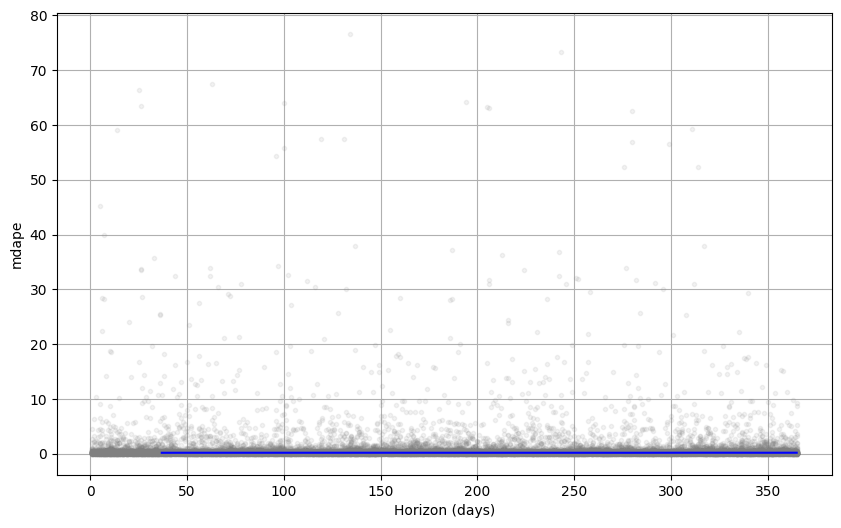

In [135]:
plot = plot_cross_validation_metric(prophet_validation, metric='mdape')

(0.0, 1.0)

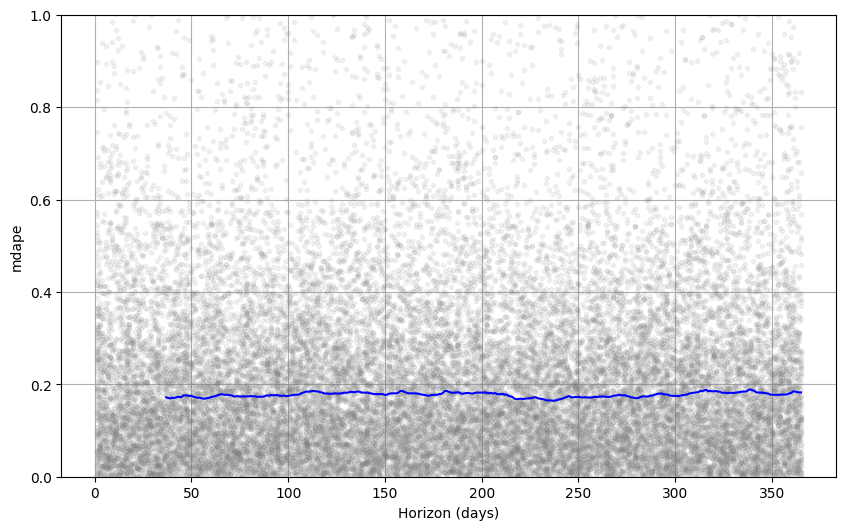

In [137]:
plot = plot_cross_validation_metric(prophet_validation, metric='mdape')
plt.ylim(0,1)

In [ ]:
# Over time the changes stay consistent around 18%